# YOLOv5 Tutorial

This notebook provides a tutorial for running inference on a static image in order to detect objects.
The implementation of the [YOLOv5DetectorLearner](https://github.com/opendr-eu/opendr/blob/master/docs/reference/object-detection-2d-yolov5.md) supports inference only at the moment and relies on the Pytorch Hub model availability.
More information on modifications and license can be found
[here](https://github.com/opendr-eu/opendr/blob/master/src/opendr/perception/object_detection_2d/yolov5/README.md).

Via the PyTorch Hub, all models provided by [Ultralytics](https://github.com/ultralytics/yolov5) are available for use within OpenDR.
The model architecture is passed onto the `model_name` parameter of the learner. Custom weights can be loaded by setting the `path` parameter to the path of the saved weights.


## Loading a pretrained model

For a list of available architectures you can print the `available_models` attribute of the learner:

In [1]:
from opendr.perception.object_detection_2d import YOLOv5DetectorLearner

print(YOLOv5DetectorLearner.available_models)

/home/administrator/opendr/venv/lib/python3.8/site-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.8.0` and `torch==1.9.0+cu111` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


['yolov5s', 'yolov5n', 'yolov5m', 'yolov5l', 'yolov5x', 'yolov5n6', 'yolov5s6', 'yolov5m6', 'yolov5l6', 'custom']


To load a model pretrained on COCO, simply initialize the learner by passing the desired architecture name as the `model_name` parameter. The learner will then download the weights and initialize the detector.

In [2]:
learner = YOLOv5DetectorLearner(model_name='yolov5s')

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /home/administrator/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-11-28 Python-3.8.10 torch-1.9.0+cu111 CUDA:0 (NVIDIA GeForce RTX 2070 SUPER, 7982MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


The detector is now ready for inference. OpenDR and OpenCV images are supported:

  0%|          | 0.00/165k [00:00<?, ?B/s]

  0%|          | 0.00/476k [00:00<?, ?B/s]

(720, 1280, 3)


/home/administrator/opendr/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/administrator/opendr/venv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


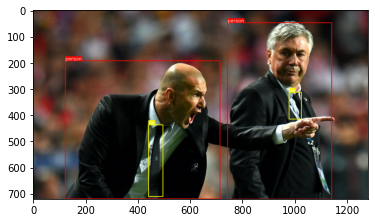

In [6]:
import torch
import cv2
%matplotlib inline
from matplotlib import pyplot as plt
from opendr.engine.data import Image
from opendr.perception.object_detection_2d import draw_bounding_boxes

for f in 'zidane.jpg', 'bus.jpg':
    torch.hub.download_url_to_file('https://ultralytics.com/images/' + f, f)  # download 2 images


im1 = Image.open('zidane.jpg')
results = learner.infer(im1)
im1_dets = draw_bounding_boxes(im1.opencv(), results, learner.classes, show=False, line_thickness=3)
print(im1_dets.shape)
plt.imshow(cv2.cvtColor(im1_dets, cv2.COLOR_BGR2RGB))


/home/administrator/opendr/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/administrator/opendr/venv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


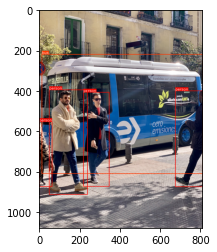

In [7]:
im2 = cv2.imread('bus.jpg')
results = learner.infer(im2)
im2_dets = draw_bounding_boxes(im2, results, learner.classes, show=False, line_thickness=3)
plt.imshow(cv2.cvtColor(im2_dets, cv2.COLOR_BGR2RGB))


## Loading a custom model

To load a custom model, the `path` parameter of the learner must be set to point to the weights file of your model:

In [ ]:
learner = YOLOv5DetectorLearner(model_name='yolov5s', path='yolov5s.pt')

Then the detector can be used in the same manner as the pretrained ones.